Importing all the necessary packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes =True)
%matplotlib inline

Import the csv file and import the name as df

In [2]:
df=pd.read_csv("D:\\sumii\\diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,5,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,4.0,35.0,168.0,43.1,2.288,33,1


In [3]:
diab=df.copy()
validation=df[700:]
diab.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,5,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,4.0,35.0,168.0,43.1,2.288,33,1


checking if there is any null values or NaN ; if true drop them off

In [4]:
diab.isnull().values.any()

True

In [5]:
diab.dropna(inplace=True)

In [6]:
diab.isnull().values.any()

False

In [7]:
diab.shape, validation.shape

((392, 9), (68, 9))

Finding the descriptive statistics for the dataset

In [8]:
diab.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,3.301020,100.862245,54.454082,26.114796,105.913265,30.078571,0.540449,29.119898,0.331633
std,3.211424,55.252792,29.234792,12.689065,117.083102,11.386446,0.364272,11.445787,0.471401
min,0.000000,1.000000,1.000000,1.000000,1.000000,2.100000,0.110000,3.000000,0.000000
25%,1.000000,77.750000,16.000000,17.750000,20.500000,25.600000,0.279750,23.000000,0.000000
50%,2.000000,114.500000,65.000000,27.000000,71.000000,32.800000,0.454500,26.000000,0.000000
75%,5.000000,139.500000,76.000000,35.000000,152.000000,36.600000,0.692000,34.000000,1.000000
max,17.000000,198.000000,98.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Splitting the dataframe into two subsets for convenient analysis

In [9]:
diab1=diab[diab.Outcome==1]
diab0=diab[diab.Outcome==0]

In [10]:
diab1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
4,0,137.0,4.0,35.0,168.0,43.1,2.288,33,1
6,3,78.0,5.0,32.0,88.0,31.0,0.248,26,1
8,2,197.0,7.0,45.0,543.0,3.5,0.158,53,1
13,1,189.0,6.0,23.0,846.0,3.1,0.398,59,1
14,5,166.0,72.0,19.0,175.0,25.8,0.587,51,1
...,...,...,...,...,...,...,...,...,...
732,2,174.0,88.0,37.0,12.0,44.5,0.646,24,1
740,11,12.0,8.0,37.0,15.0,42.3,0.785,48,1
748,3,187.0,7.0,22.0,2.0,36.4,0.480,36,1
753,0,181.0,88.0,44.0,51.0,43.3,0.222,26,1


In [11]:
diab0

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
18,1,13.0,3.0,38.0,83.0,43.3,0.183,33,0
20,3,126.0,88.0,41.0,235.0,39.3,0.740,27,0
27,1,97.0,66.0,15.0,14.0,23.2,0.487,22,0
28,13,145.0,82.0,19.0,11.0,22.2,0.245,57,0
...,...,...,...,...,...,...,...,...,...
747,1,81.0,74.0,41.0,57.0,46.3,1.960,32,0
751,1,121.0,78.0,39.0,74.0,39.0,0.261,28,0
760,2,88.0,58.0,26.0,16.0,28.4,0.766,22,0
763,10,11.0,76.0,48.0,18.0,32.9,0.171,63,0


Graphical representation of Outcomes:

Text(0.5, 1.0, 'Count Plot for Outcome')

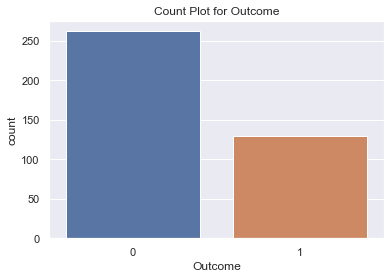

In [12]:
sns.countplot(x=diab.Outcome)
plt.title("Count Plot for Outcome")

In [13]:
Outcome0=len(diab[diab.Outcome==1])
Outcome1=len(diab[diab.Outcome==0])
Total=Outcome0+Outcome1
Percentage_of_1 = Outcome1*100/Total
Percentage_of_0 = Outcome0*100/Total
Percentage_of_1,Percentage_of_0

(66.83673469387755, 33.16326530612245)

From the dataset 66.83% are diabetic, and 33.16% are non diabetic

Analyzing the relationship between outcome and other variables:
    
1.outcome vs pregnancies

Text(0.5, 1.0, 'Boxplot for Pregnancies by Outcome')

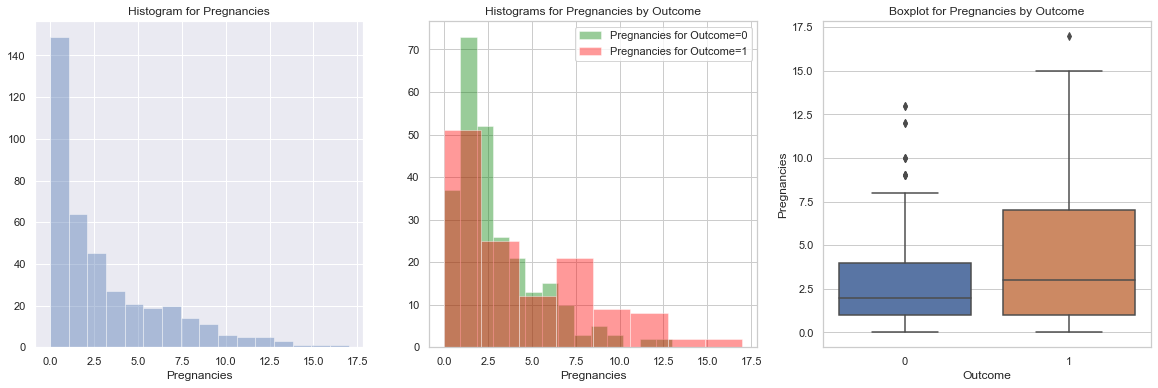

In [14]:
plt.figure(figsize=(20, 6))
plt.subplot(1,3,1)
sns.set_style("whitegrid")
plt.title("Histogram for Pregnancies")
sns.distplot(diab.Pregnancies,kde=False)
plt.subplot(1,3,2)
sns.distplot(diab0.Pregnancies,kde=False,color="Green", label="Pregnancies for Outcome=0")
sns.distplot(diab1.Pregnancies,kde=False,color = "Red", label = "Pregnancies for Outcome=1")
plt.title("Histograms for Pregnancies by Outcome")
plt.legend()
plt.subplot(1,3,3)
sns.boxplot(x=diab.Outcome,y=diab.Pregnancies)
plt.title("Boxplot for Pregnancies by Outcome")

2.outcome vs glucose

Text(0.5, 1.0, 'Boxplot for Glucose by Outcome')

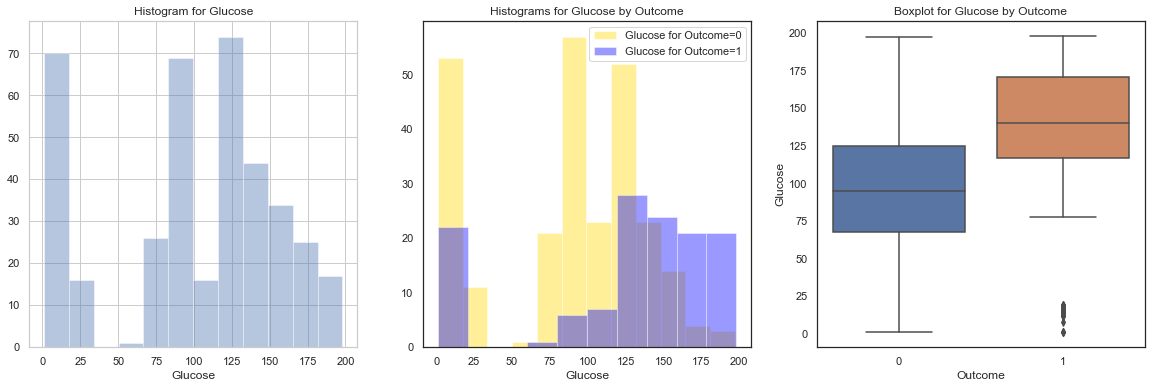

In [15]:
plt.figure(figsize=(20, 6))
plt.subplot(1,3,1)
sns.set_style("white")
plt.title("Histogram for Glucose")
sns.distplot(diab.Glucose, kde=False)
plt.subplot(1,3,2)
sns.distplot(diab0.Glucose,kde=False,color="Gold", label="Glucose for Outcome=0")
sns.distplot(diab1.Glucose, kde=False, color="Blue", label = "Glucose for Outcome=1")
plt.title("Histograms for Glucose by Outcome")
plt.legend()
plt.subplot(1,3,3)
sns.boxplot(x=diab.Outcome,y=diab.Glucose)
plt.title("Boxplot for Glucose by Outcome")

3.outcome vs Blood pressure

Text(0.5, 1.0, 'Boxplot of BP by Outcome')

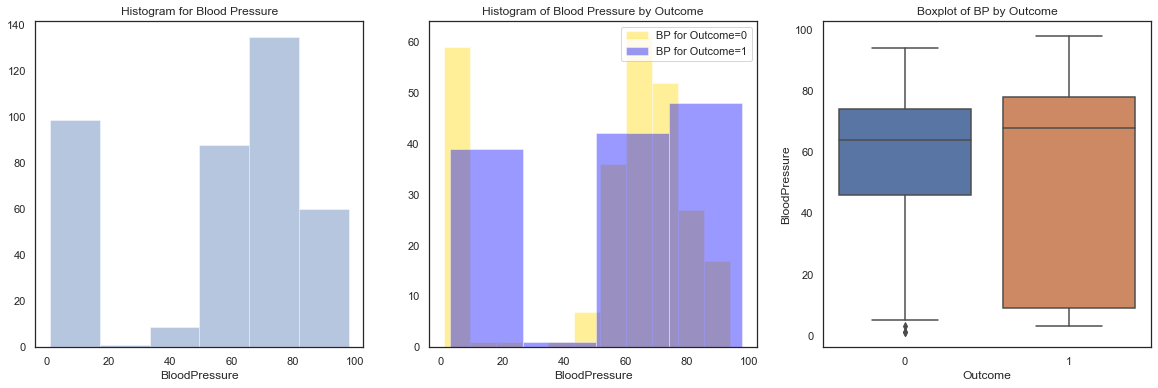

In [16]:
plt.figure(figsize=(20, 6))
plt.subplot(1,3,1)
sns.set_style("white")
sns.distplot(diab.BloodPressure, kde=False)
plt.title("Histogram for Blood Pressure")
plt.subplot(1,3,2)
sns.distplot(diab0.BloodPressure,kde=False,color="Gold",label="BP for Outcome=0")
sns.distplot(diab1.BloodPressure,kde=False, color="Blue", label="BP for Outcome=1")
plt.legend()
plt.title("Histogram of Blood Pressure by Outcome")
plt.subplot(1,3,3)
sns.boxplot(x=diab.Outcome,y=diab.BloodPressure)
plt.title("Boxplot of BP by Outcome")

4.outcome vs skin thickness

Text(0.5, 1.0, 'Boxplot of SkinThickness by Outcome')

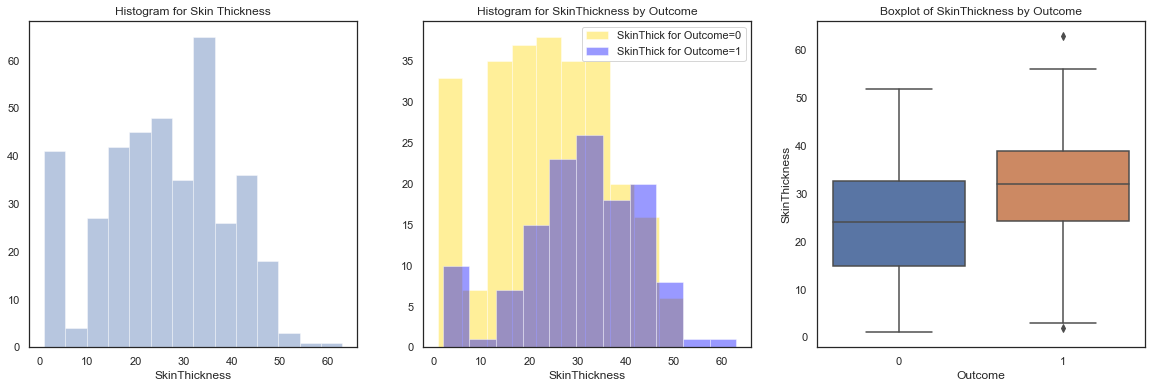

In [17]:
plt.figure(figsize=(20, 6))
plt.subplot(1,3,1)
sns.distplot(diab.SkinThickness, kde=False)
plt.title("Histogram for Skin Thickness")
plt.subplot(1,3,2)
sns.distplot(diab0.SkinThickness, kde=False, color="Gold", label="SkinThick for Outcome=0")
sns.distplot(diab1.SkinThickness, kde=False, color="Blue", label="SkinThick for Outcome=1")
plt.legend()
plt.title("Histogram for SkinThickness by Outcome")
plt.subplot(1,3,3)
sns.boxplot(x=diab.Outcome, y=diab.SkinThickness)
plt.title("Boxplot of SkinThickness by Outcome")

5.Outcome vs Insulin

Text(0.5, 1.0, 'Boxplot for Insulin by Outcome')

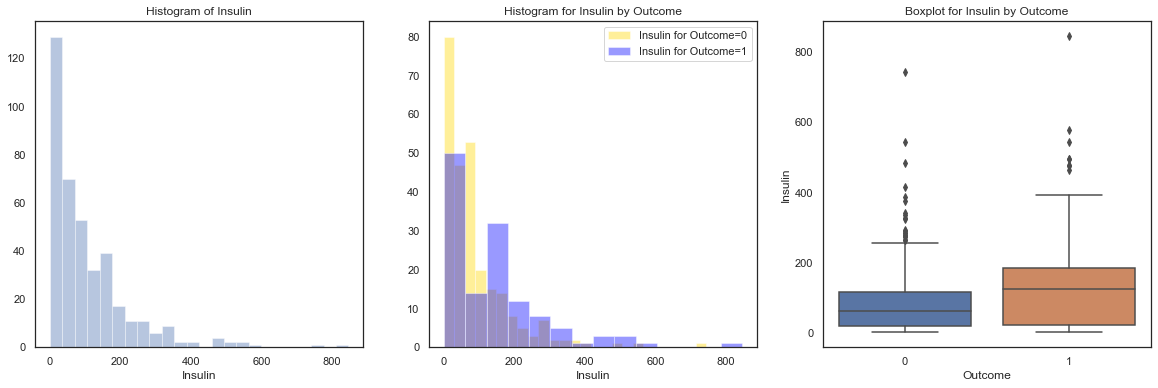

In [18]:
plt.figure(figsize=(20, 6))
plt.subplot(1,3,1)
sns.distplot(diab.Insulin,kde=False)
plt.title("Histogram of Insulin")
plt.subplot(1,3,2)
sns.distplot(diab0.Insulin,kde=False, color="Gold", label="Insulin for Outcome=0")
sns.distplot(diab1.Insulin,kde=False, color="Blue", label="Insulin for Outcome=1")
plt.title("Histogram for Insulin by Outcome")
plt.legend()
plt.subplot(1,3,3)
sns.boxplot(x=diab.Outcome, y=diab.Insulin)
plt.title("Boxplot for Insulin by Outcome")

6.Outcome vs BMI

Text(0.5, 1.0, 'Boxplot for BMI by Outcome')

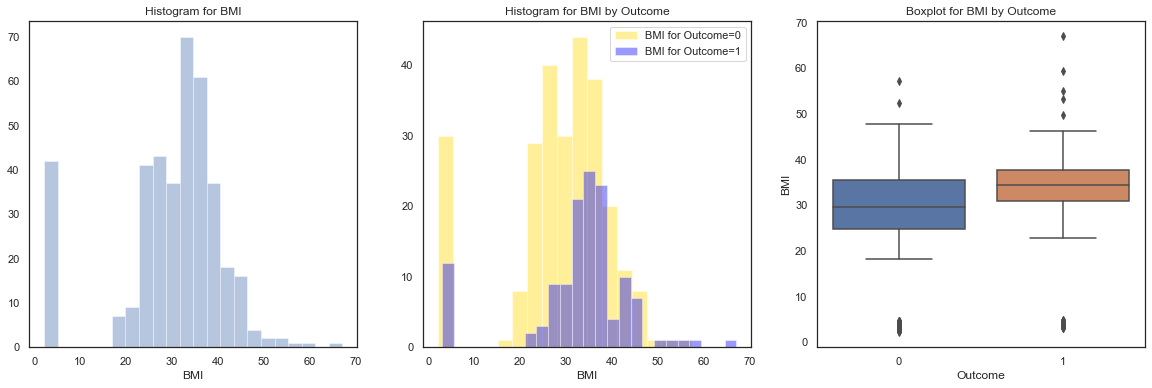

In [19]:
plt.figure(figsize=(20, 6))
plt.subplot(1,3,1)
sns.distplot(diab.BMI, kde=False)
plt.title("Histogram for BMI")
plt.subplot(1,3,2)
sns.distplot(diab0.BMI, kde=False,color="Gold", label="BMI for Outcome=0")
sns.distplot(diab1.BMI, kde=False, color="Blue", label="BMI for Outcome=1")
plt.legend()
plt.title("Histogram for BMI by Outcome")
plt.subplot(1,3,3)
sns.boxplot(x=diab.Outcome, y=diab.BMI)
plt.title("Boxplot for BMI by Outcome")

7.Outcome vs Diabetes Pedigree Function

Text(0.5, 1.0, 'Boxplot for DiabetesPedigreeFunction by Outcome')

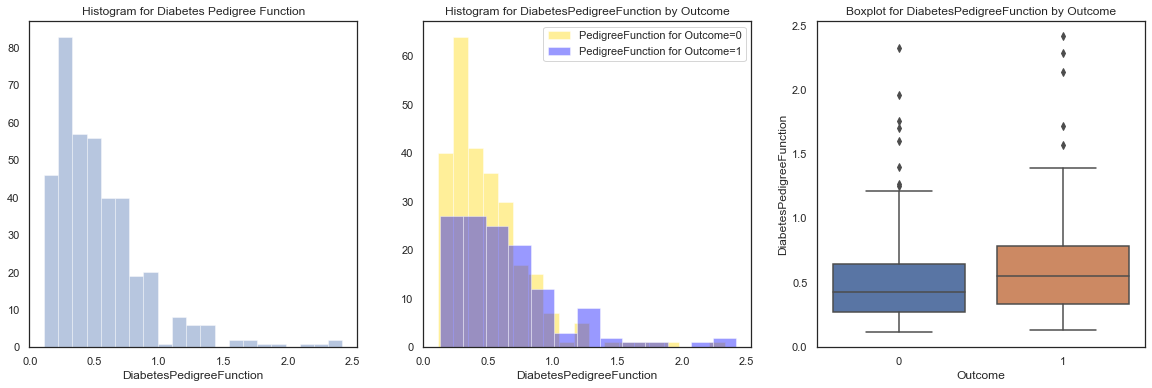

In [20]:
plt.figure(figsize=(20, 6))
plt.subplot(1,3,1)
sns.distplot(diab.DiabetesPedigreeFunction,kde=False)
plt.title("Histogram for Diabetes Pedigree Function")
plt.subplot(1,3,2)
sns.distplot(diab0.DiabetesPedigreeFunction, kde=False, color="Gold", label="PedigreeFunction for Outcome=0")
sns.distplot(diab1.DiabetesPedigreeFunction, kde=False, color="Blue", label="PedigreeFunction for Outcome=1")
plt.legend()
plt.title("Histogram for DiabetesPedigreeFunction by Outcome")
plt.subplot(1,3,3)
sns.boxplot(x=diab.Outcome, y=diab.DiabetesPedigreeFunction)
plt.title("Boxplot for DiabetesPedigreeFunction by Outcome")

8.Outcome vs Age

Text(0.5, 1.0, 'Boxplot for Age by Outcome')

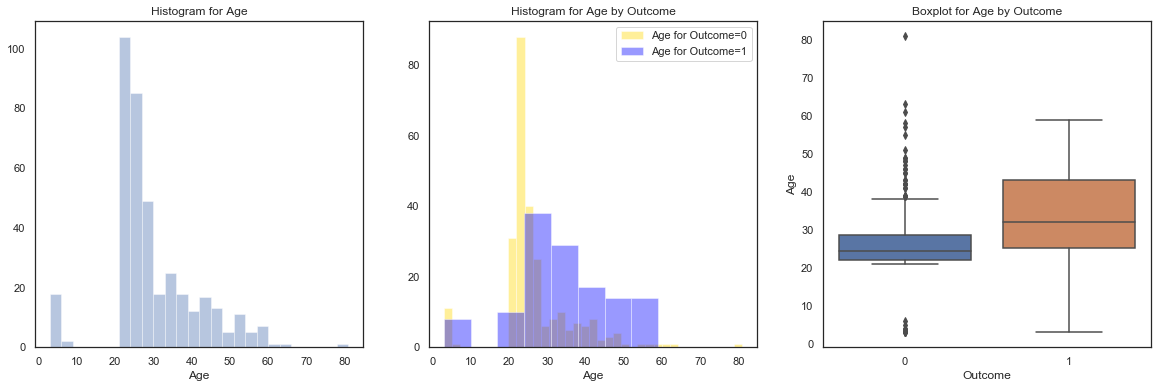

In [21]:
plt.figure(figsize=(20, 6))
plt.subplot(1,3,1)
sns.distplot(diab.Age,kde=False)
plt.title("Histogram for Age")
plt.subplot(1,3,2)
sns.distplot(diab0.Age,kde=False,color="Gold", label="Age for Outcome=0")
sns.distplot(diab1.Age,kde=False, color="Blue", label="Age for Outcome=1")
plt.legend()
plt.title("Histogram for Age by Outcome")
plt.subplot(1,3,3)
sns.boxplot(x=diab.Outcome,y=diab.Age)
plt.title("Boxplot for Age by Outcome")

Finding P-Values for all the variables

In [22]:
## importing stats module from scipy
from scipy import stats
## retrieving p value from normality test function
PregnanciesPVAL=stats.normaltest(diab.Pregnancies).pvalue
GlucosePVAL=stats.normaltest(diab.Glucose).pvalue
BloodPressurePVAL=stats.normaltest(diab.BloodPressure).pvalue
SkinThicknessPVAL=stats.normaltest(diab.SkinThickness).pvalue
InsulinPVAL=stats.normaltest(diab.Insulin).pvalue
BMIPVAL=stats.normaltest(diab.BMI).pvalue
PedFuncPVAL=stats.normaltest(diab.DiabetesPedigreeFunction).pvalue
AgePVAL=stats.normaltest(diab.Age).pvalue
print()
print("Pregnancies p-Value is: ",PregnanciesPVAL)
print("Glucose p-Value is: ",GlucosePVAL)
print("BloodPressure p-Value is: ",BloodPressurePVAL)
print("Skin Thickness p-Value is: ",SkinThicknessPVAL)
print("Insulin p-Value is: ",InsulinPVAL)
print("BMI p-Value is: ",BMIPVAL)
print("Diabetes Pedigree Function p-Value is: ",PedFuncPVAL)
print("Age p-Value is: ",AgePVAL)


Pregnancies p-Value is:  6.155097831782508e-20
Glucose p-Value is:  2.8171420572302876e-11
BloodPressure p-Value is:  8.679126020154893e-21
Skin Thickness p-Value is:  0.00472288678253861
Insulin p-Value is:  2.2383891042975147e-47
BMI p-Value is:  7.702620051857077e-12
Diabetes Pedigree Function p-Value is:  9.385468899760201e-39
Age p-Value is:  1.199989530066698e-09


Pair plot graph:

Text(0.5, 1, 'Pairplot of Variables by Outcome')

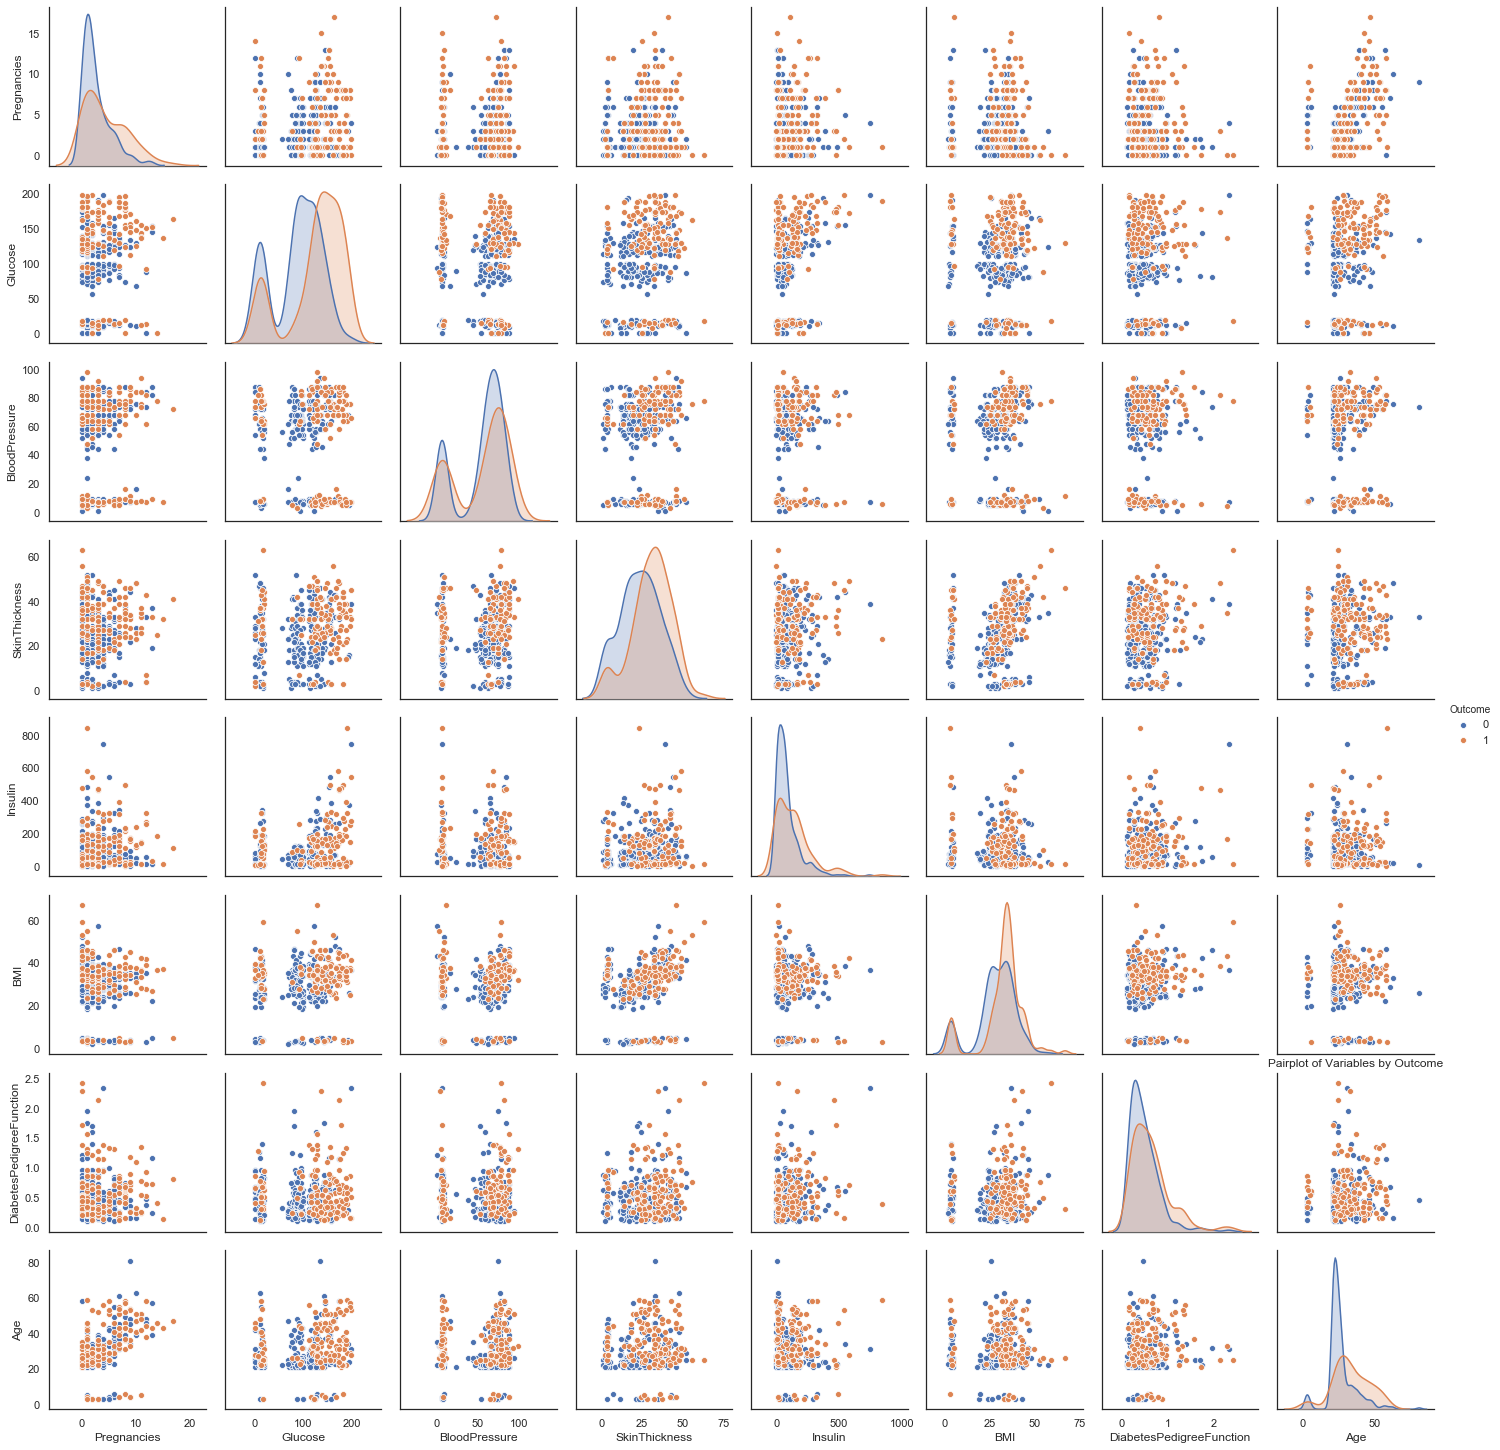

In [23]:
sns.pairplot(diab, vars=["Pregnancies", "Glucose","BloodPressure","SkinThickness","Insulin", "BMI","DiabetesPedigreeFunction", "Age"],hue="Outcome")
plt.title("Pairplot of Variables by Outcome")

Finding correlation:

In [24]:
cor=diab.corr()
cor

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.146345,0.045967,0.065803,0.049526,-0.057546,-0.011779,0.517938,0.256566
Glucose,0.146345,1.000000,0.016277,0.171885,0.293405,0.104887,0.042547,0.127832,0.329034
BloodPressure,0.045967,0.016277,1.000000,0.028940,-0.050932,-0.015916,0.013865,0.050397,0.000737
SkinThickness,0.065803,0.171885,0.028940,1.000000,0.119730,0.262120,0.151924,0.105509,0.268971
Insulin,0.049526,0.293405,-0.050932,0.119730,1.000000,-0.067925,0.168701,0.044643,0.207654
BMI,-0.057546,0.104887,-0.015916,0.262120,-0.067925,1.000000,0.083197,0.022499,0.181484
DiabetesPedigreeFunction,-0.011779,0.042547,0.013865,0.151924,0.168701,0.083197,1.000000,0.102267,0.193659
Age,0.517938,0.127832,0.050397,0.105509,0.044643,0.022499,0.102267,1.000000,0.283653
Outcome,0.256566,0.329034,0.000737,0.268971,0.207654,0.181484,0.193659,0.283653,1.000000


Representing the correlation using Heatmap:

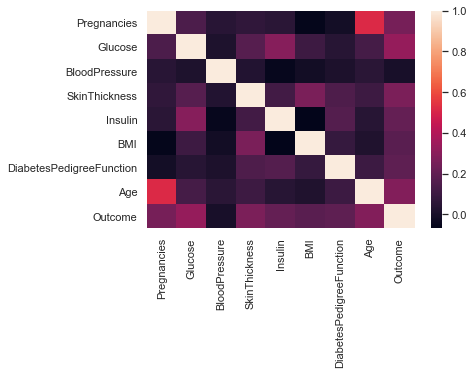

In [25]:
sns.heatmap(cor)

Assigning X and y

In [26]:
cols1=["Pregnancies", "Glucose","BloodPressure","SkinThickness","Insulin", "BMI","DiabetesPedigreeFunction", "Age"]
X=diab[cols1]
y=diab.Outcome

In [27]:
diab.shape

(392, 9)

Logistic regression:

In [28]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.616357
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                  392
Model:                          Logit   Df Residuals:                      384
Method:                           MLE   Df Model:                            7
Date:                Mon, 29 Jun 2020   Pseudo R-squ.:                 0.02986
Time:                        11:44:44   Log-Likelihood:                -241.61
converged:                       True   LL-Null:                       -249.05
Covariance Type:            nonrobust   LLR p-value:                   0.03765
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Pregnancies                  0.1159      0.041      2.844      0.004       0.036

r-Square value=61.6%
When p-value<0.05, we can say the variable influences the outcome
so we remove skinthickness, insulin, diabetes pedigree function and age, now re-run the model

In [29]:
cols2=["Pregnancies", "Glucose","BloodPressure","BMI"]
X=diab[cols2]

In [30]:
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.622420
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                  392
Model:                          Logit   Df Residuals:                      388
Method:                           MLE   Df Model:                            3
Date:                Mon, 29 Jun 2020   Pseudo R-squ.:                 0.02032
Time:                        11:44:44   Log-Likelihood:                -243.99
converged:                       True   LL-Null:                       -249.05
Covariance Type:            nonrobust   LLR p-value:                   0.01757
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Pregnancies       0.0872      0.033      2.609      0.009       0.022       0.153
Glucose           0.

r-Square value=62.2%
When p-value<0.05, we can say the variable influences the outcome
Here all the variables matches the condition

In [31]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
cols4=["Pregnancies", "Glucose","BloodPressure","BMI"]
X=diab[cols4]
y=diab.Outcome
logreg.fit(X,y)
y_pred=logreg.predict(X)

Finding accuracy score, classification report and confusion matrix:

In [32]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print(accuracy_score(y,y_pred))
print(classification_report(y,y_pred))
print(confusion_matrix(y,y_pred))

0.7474489795918368
              precision    recall  f1-score   support

           0       0.77      0.89      0.83       262
           1       0.68      0.45      0.54       130

    accuracy                           0.75       392
   macro avg       0.72      0.67      0.68       392
weighted avg       0.74      0.75      0.73       392

[[234  28]
 [ 71  59]]


Validating the data:

In [33]:
validation.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
700,2,122.0,76.0,27.0,2.0,35.9,0.483,26,0
701,6,125.0,78.0,31.0,NaN,27.6,0.565,49,1
702,1,168.0,88.0,29.0,NaN,35.0,0.950,52,1
703,2,129.0,NaN,NaN,NaN,38.5,0.340,41,0
704,4,11.0,76.0,2.0,1.0,28.4,0.118,27,0


In [34]:
validation.shape

(68, 9)

In [35]:
validation.dropna(inplace=True)

C:\Users\91988\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [36]:
validation.isnull().values.any()

False

In [37]:
validation.shape

(32, 9)

In [38]:
validation.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32 entries, 700 to 765
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               32 non-null     int64  
 1   Glucose                   32 non-null     float64
 2   BloodPressure             32 non-null     float64
 3   SkinThickness             32 non-null     float64
 4   Insulin                   32 non-null     float64
 5   BMI                       32 non-null     float64
 6   DiabetesPedigreeFunction  32 non-null     float64
 7   Age                       32 non-null     int64  
 8   Outcome                   32 non-null     int64  
dtypes: float64(6), int64(3)
memory usage: 2.5 KB


In [39]:
cols_validation=["Pregnancies", "Glucose","BloodPressure","BMI"]
validation_X=validation[cols_validation]
validation_y=validation.Outcome

In [40]:
predict_validation=logreg.predict(validation_X)

In [41]:
print(accuracy_score(validation_y,predict_validation))
print(classification_report(validation_y,predict_validation))
print(confusion_matrix(validation_y,predict_validation))

0.8125
              precision    recall  f1-score   support

           0       0.81      0.95      0.88        22
           1       0.83      0.50      0.62        10

    accuracy                           0.81        32
   macro avg       0.82      0.73      0.75        32
weighted avg       0.82      0.81      0.80        32

[[21  1]
 [ 5  5]]


Inference:
From the predition: (shape:392)
Precision of the model is 74%
234+59 are correct predictions and 71+28 are incorrect prediction

From the validation: (shape:32)
Precision of the model is 82%
21+5 are correct predictions and 5+1 are incorrect prediction
